# Image processing with Python, NumPy

By reading the image as a NumPy array ndarray, various image processing can be performed using NumPy functions. In this notebook, I will introduce some basic image processing techniques using NumPy.

There exists a lot of image processing library such as `cv2` or `scikit-image`, in this `notebook` we will only use `numpy`.

## Image

You will find the `lena.jpg` image at the same level as this notebook. 

![lena](lena.jpg)

The imageha a shape of **(225, 400, 3)** which means that the image has **225** rows, **400** columns and **3** color channels. The image is in **RGB** format.

<img src="images/doc/three_d_array.png" alt="threedarray" width="500">

## NumPy

We'll use numpy to manipulate the image. The image will be converted to a 3d-ndarray of shape **(225, 400, 3)**.

## Pillow

Pillow is a Python library that allows you to read, write and manipulate images. It is a part of the Python Imaging Library (PIL). We will use it to read the image.

### Instsll Pillow

Open a terminal in the right `conda` environment (*nomades_nppd_310*). Run the following command:
  
```bash
conda install pillow 
```

We will use Pillow to read the image, then the mage will be transformed as a 3d-ndarray of shape **(225, 400, 3)** using this command:

```python
import numpy as np
from PIL import Image
im = np.array(Image.open('./lena.jpg'))
print(im.shape)
# you should see (225, 400, 3) as output
```

## Objectives

**The goal of this exeercise is to understand how to manipulates `NumPy` arrays by performing some easy image processing techniques.**

In [48]:
# Imports
import numpy as np              # Numpy for computing the image as array
from PIL import Image           # PIL for opening the image; install using : conda install -c anaconda pillow
import matplotlib.pyplot as plt # Matplotlib for displaying the image 

In [52]:
def display_image(image: np.ndarray, title: str=None):
    """
    Display the image using matplotlib
    Args:
    image: ndarray: The image as an numpy array
    title: str: The title of the image, default is None
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


##### Open the image as 3D numpy array

In [58]:
# # Load the image
# im = np.array(Image.open('./lena.jpg'))
# print((im))

# Load the image
im = np.array(Image.open('./lena.jpg'))

# Print image details instead of the whole array
print(f"Image shape: {im.shape}")
print(f"Image data type: {im.dtype}")



Image shape: (225, 400, 3)
Image data type: uint8


##### Display original image

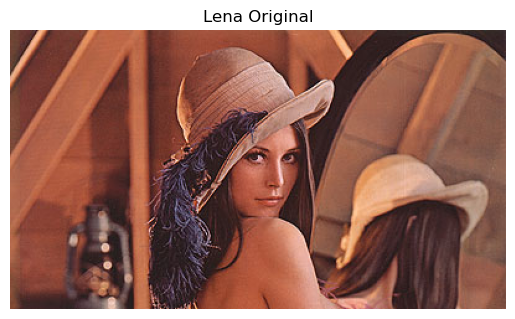

In [56]:
# display_image(im, 'Lena Original')

# Display the image with the title 'Lena Original'


display_image(im, 'Lena Original')




##### Function that save image

In [64]:
# def save_image(image: np.ndarray, name: str='lena_copy.jpg'):
#     """
#     Save the image to the disk
#     Args:
#     image: ndarray: The image as an numpy array
#     """
#     im = Image.fromarray(image)
#     im.save(name)
def save_image(image: np.ndarray, name: str='lena_copy.jpg'):
    """
    Save the image to the disk
    
    Args:
    image: ndarray: The image as a numpy array
    name: str: The name of the file to save the image, default is 'lena_copy.jpg'
    """
    # Convert the numpy array to a PIL Image
    im = Image.fromarray(image)
    
    # Save the image to the specified file path
    im.save(name)
    
    # Assuming 'im' is your image array
save_image(im, 'my_image.jpg')


### Grayscale

the first function we willl implement is the grayscale effect. The grayscale effect will convert the image to grayscale. To apply the grayscale effect **we need to provide the same value for the three components `r`, `g`, `b`** we will use the following algorithm:
- loop througth the image (row, cols)
- compute the mean of the 3D axis (axis 2) (r/3 + g/3 + b/3) `/!\ don't do (r+g+b)/3`
- set the mean value for each component

##### Example

![grayscale](images/doc/grayscale.png)

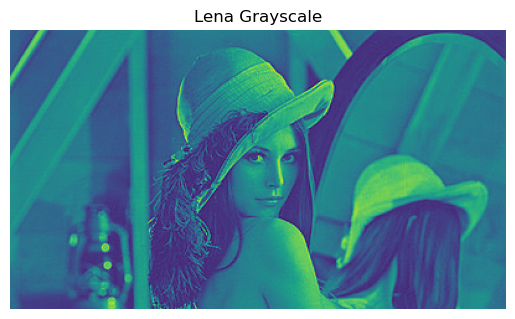

In [123]:
# def grayscale(image: np.ndarray):
#     """
#     Convert the image to grayscale
#     Args:
#     image: ndarray: The image as an numpy array
#     Returns:
#     ndarray: The grayscale image
#     """
#     grayscale_image = np.zeros_like(image) # Create an empty array with the same shape as the image
#     # TODO: Convert the image to grayscale
#     return grayscale_image

# lena_grayscale = grayscale(im)
# display_image(lena_grayscale, 'Lena Grayscale')

def grayscale(image: np.ndarray):
    """
    Convert the image to grayscale
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    ndarray: The grayscale image
    """
    # Apply the grayscale formula using weighted sum of R, G, B
    grayscale_image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
    
    # Convert the image back to uint8 (as it might turn to float after dot product)
    grayscale_image = grayscale_image.astype(np.uint8)
    
    return grayscale_image
lena_grayscale = grayscale(im)
display_image(lena_grayscale, 'Lena Grayscale')


### Lena Red

The goal here is to take only the red componenent of the image. The returned image is still a 3D array where the `blue` and `green` components are set to 0.

##### Example

![red](images/doc/lena_red.png)

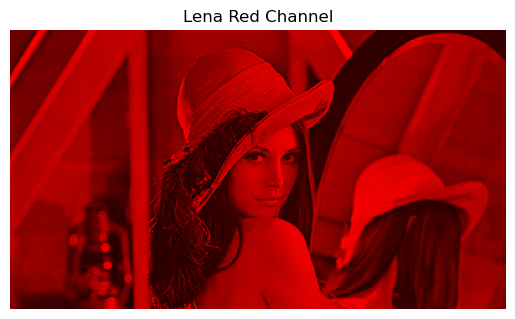

In [127]:
def lena_red(image: np.ndarray):
    """
    Extract the red channel from the image
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    ndarray: The red channel of the image
    """
    # Create a copy of the image
    red_image = np.zeros_like(image)
    
    # Copy the red channel from the original image
    red_image[..., 0] = image[..., 0]  # Red channel remains the same
    
    # The green and blue channels remain zero (as initialized)
    return red_image


lred = lena_red(im)
display_image(lred, 'Lena Red Channel')

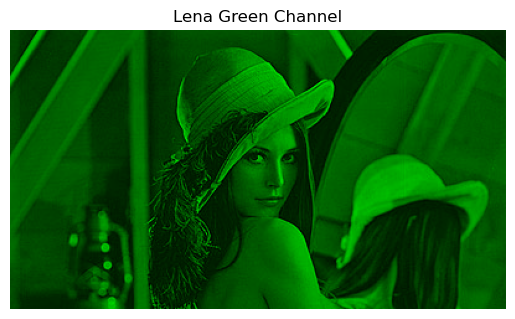

In [87]:
def lena_green(image: np.ndarray):
    """
    Extract the green channel from the image
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    ndarray: The green channel of the image
    """
    # Create a copy of the image with zeros (black image)
    green_image = np.zeros_like(image)
    
    # Copy the green channel from the original image
    green_image[..., 1] = image[..., 1]  # Green channel remains the same
    
    # The red and blue channels remain zero
    return green_image

lgreen = lena_green(im)
display_image(lgreen, 'Lena Green Channel')

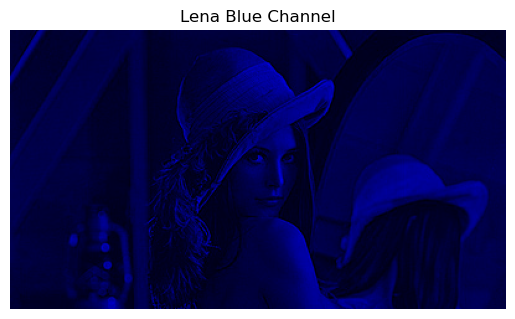

In [94]:
def lena_blue(image: np.ndarray):
    """
    Extract the blue channel from the image
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    ndarray: The blue channel of the image
    """
    # Create a copy of the image with zeros (black image)
    blue_image = np.zeros_like(image)
    
    # Copy the blue channel from the original image
    blue_image[..., 2] = image[..., 2]  # Blue channel remains the same
    
    # The red and green channels remain zero
    return blue_image


lblue = lena_blue(im)
display_image(lblue, 'Lena Blue Channel')

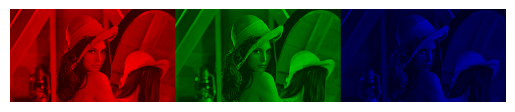

In [92]:
if lred.any() and lgreen.any() and lblue.any():
  display_image(np.concatenate((lred, lgreen, lblue), axis=1))


### Negative filter

To create a negative filter we need to change each components by substracting the current componenet to the value `255`. The image will look like this: `[:, :, (255-r), (255-g), (255-b)]`

##### Example

![negative](images/doc/negative.png)

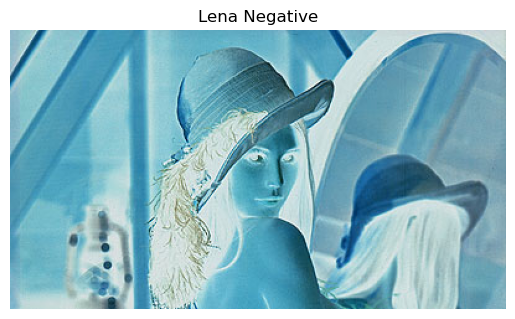

In [158]:
def negative(image: np.ndarray):
    """
    Convert the image to its negative
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    ndarray: The negative of the image
    """
    # Convert the image to its negative by subtracting pixel values from 255
    
    return 255 - image

lena_neg = negative(im)
display_image(lena_neg, 'Lena Negative')


### [CADEAU] Color reduction

Cut off the remainder of the division using `//` and multiply again, the pixel values become discrete, and the number of colors can be reduced.

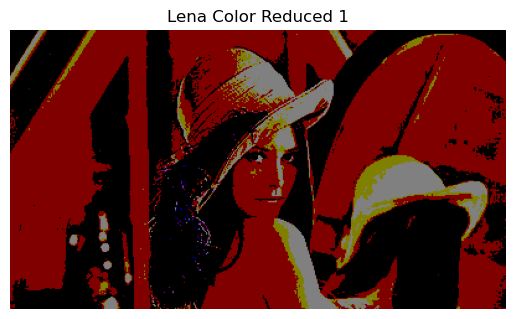

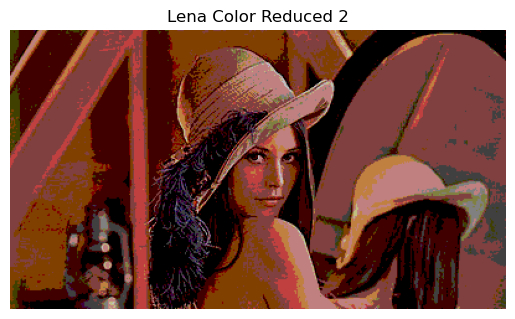

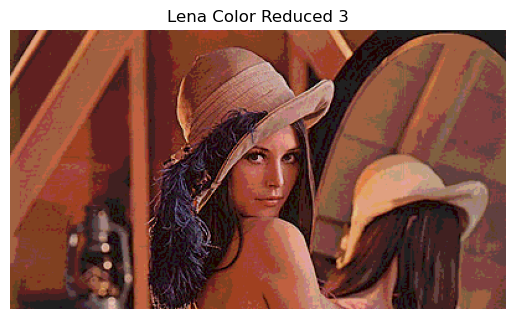

In [19]:
def color_reduced(image: np.ndarray):
    """
    Reduce the number of colors in the image
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    list: three color-reduced images
    """
    # Reduce the number of colors by quantizing the image
    reduced1 = (image // 128) * 128
    reduced2 = (image // 64) * 64
    reduced3 = (image // 32) * 32
    
    # Ensure the results are in uint8 format
    return [reduced1.astype(np.uint8), reduced2.astype(np.uint8), reduced3.astype(np.uint8)]
for i, c in enumerate(color_reduced(im)):
    display_image(c, f'Lena Color Reduced {i+1}')


### Photomaton

Photomaton function will create a new image whre the first half of the image are even column and the second half of the image are odd column.

##### Example

![photomaton](images/doc/photomaton.png)

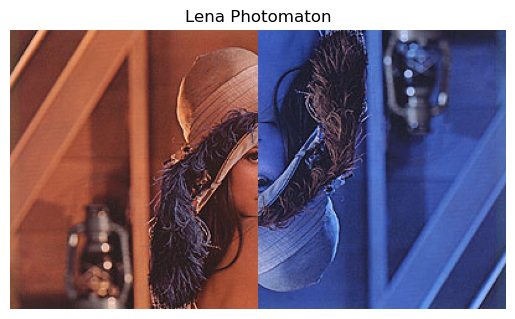

In [213]:
def photomaton(image: np.ndarray):
    """
    Apply the photomaton effect to the image.
    
    Args:
    image: ndarray: The image as a numpy array
    Returns:
    ndarray: The image with the photomaton effect
    """
    # Get the width of the image
    _, width, _ = image.shape
    
    # Create a copy of the image
    vertical_copy_image = image.copy()
    
    # Apply the photomaton effect: horizontal reflection
    # Reflect the right half of the image onto the left half
    vertical_copy_image[:, width // 2:] = np.flip(image[:, :width // 2])
    
    return vertical_copy_image
lena_photomaton = photomaton(im)
display_image(lena_photomaton, 'Lena Photomaton')


### Trimming with slice

By specifying an area with slice, you can trim it to a rectangle.

##### Example

![trimming](images/doc/trimmed.png)

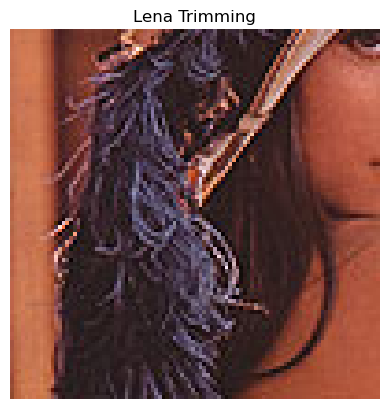

In [21]:
def trimming(image: np.ndarray, x0: int, y0: int, w: int, h: int):
    """
    Trim the image.
    
    Args:
    image: ndarray: The image as a numpy array
    x0: int: The x coordinate of the top-left corner
    y0: int: The y coordinate of the top-left corner
    w: int: The width of the new image
    h: int: The height of the new image
    Returns:
    ndarray: The trimmed image
    """
    # Compute the coordinates for the bottom-right corner
    x1 = x0 + w
    y1 = y0 + h
    
    # Trim the image
    trimmed_image = image[y0:y1, x0:x1]
    
    return trimmed_image
lena_trimmed = trimming(im, 100, 100, 100, 100)
display_image(lena_trimmed, 'Lena Trimming')


### [CADEAU] Copy and paste



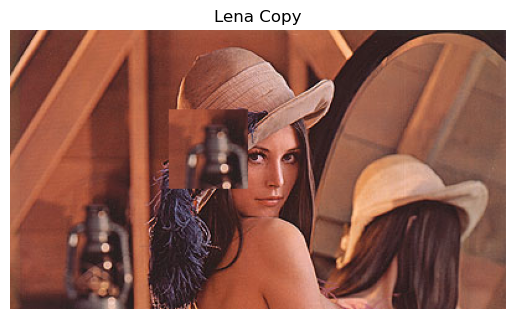

In [24]:
# dst_copy = im.copy()
# dst_copy[64:128, 128:192] = im[128:192, 32:96]
# display_image(dst_copy, 'Lena Copy')
# Create a copy of the image
dst_copy = im.copy()

# Copy a region from the original image and paste it into the new location
dst_copy[64:128, 128:192] = im[128:192, 32:96]

# Display the result
display_image(dst_copy, 'Lena Copy')


### Rotate

We can rotate the image by 90, 180 or 270 degrees. By default, the image will be rotated by 90 degrees. We'll use the `[numpy.rot90](https://numpy.org/doc/stable/reference/generated/numpy.rot90.html)` function.

##### Example

![rotate](images/doc/rotate.png)

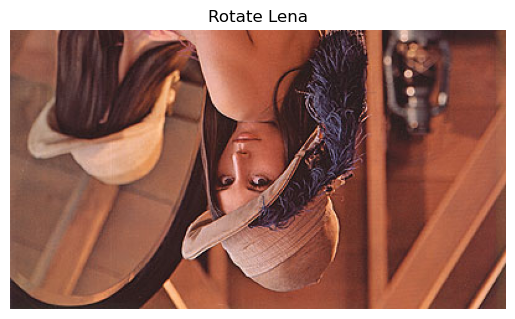

In [29]:
def rotate(image: np.ndarray, angle: float=90):
    """
    Rotate the image using the numpy rot90 function
    The rot90 function rotates the image by steps of 90 degrees
    Args:
    image: ndarray: The image as a numpy array
    angle: float: The angle of rotation, default is 90
    Returns:
    ndarray: The rotated image
    """
    # Calculate the number of 90-degree rotations required
    num_rotations = int((angle % 360) / 90)
    
    # Rotate the image using np.rot90
    rotated_image = np.rot90(image, k=num_rotations)
    
    return rotated_image
lena_rotate = rotate(im, 180)
display_image(lena_rotate, "Rotate Lena")


### Blending Two Images

You can blend two images by adding them together. If you add two images, the pixel values will be added together, so if you divide by 2, the average value will be taken.

##### Example

![blending](images/doc/blend.png)

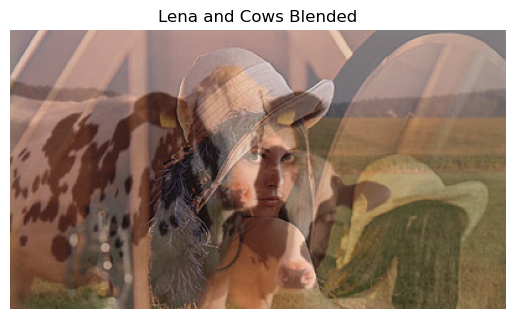

In [196]:
# Import necessary libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to display image
def display_image(image: np.ndarray, title: str=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the images
im = np.array(Image.open('./lena.jpg'))
im2 = np.array(Image.open('./cows.jpg'))

# Function to blend images
def blend(image1: np.ndarray, image2: np.ndarray, alpha: float=0.5):
    """
    Blend two images.
    
    Args:
    image1: ndarray: The first image as a numpy array
    image2: ndarray: The second image as a numpy array
    alpha: float: The weight of the first image, default is 0.5
    
    Returns:
    ndarray: The blended image
    """
    # Ensure the images have the same dimensions
    if image1.shape != image2.shape:
        raise ValueError("The dimensions of the two images must match.")
    
    # Blend the two images using alpha
    blended_image = alpha * image1 + (1 - alpha) * image2
    
    # Ensure the result is in the correct data type
    blended_image = np.clip(blended_image, 0, 255).astype(np.uint8)
    
    return blended_image

# Blend the images
lena_blend = blend(im, im2, 0.5)  # 60% of im and 40% of im2

# Display the blended image
display_image(lena_blend, 'Lena and Cows Blended')




### Display all images

![display](images/doc/all_plots.png)

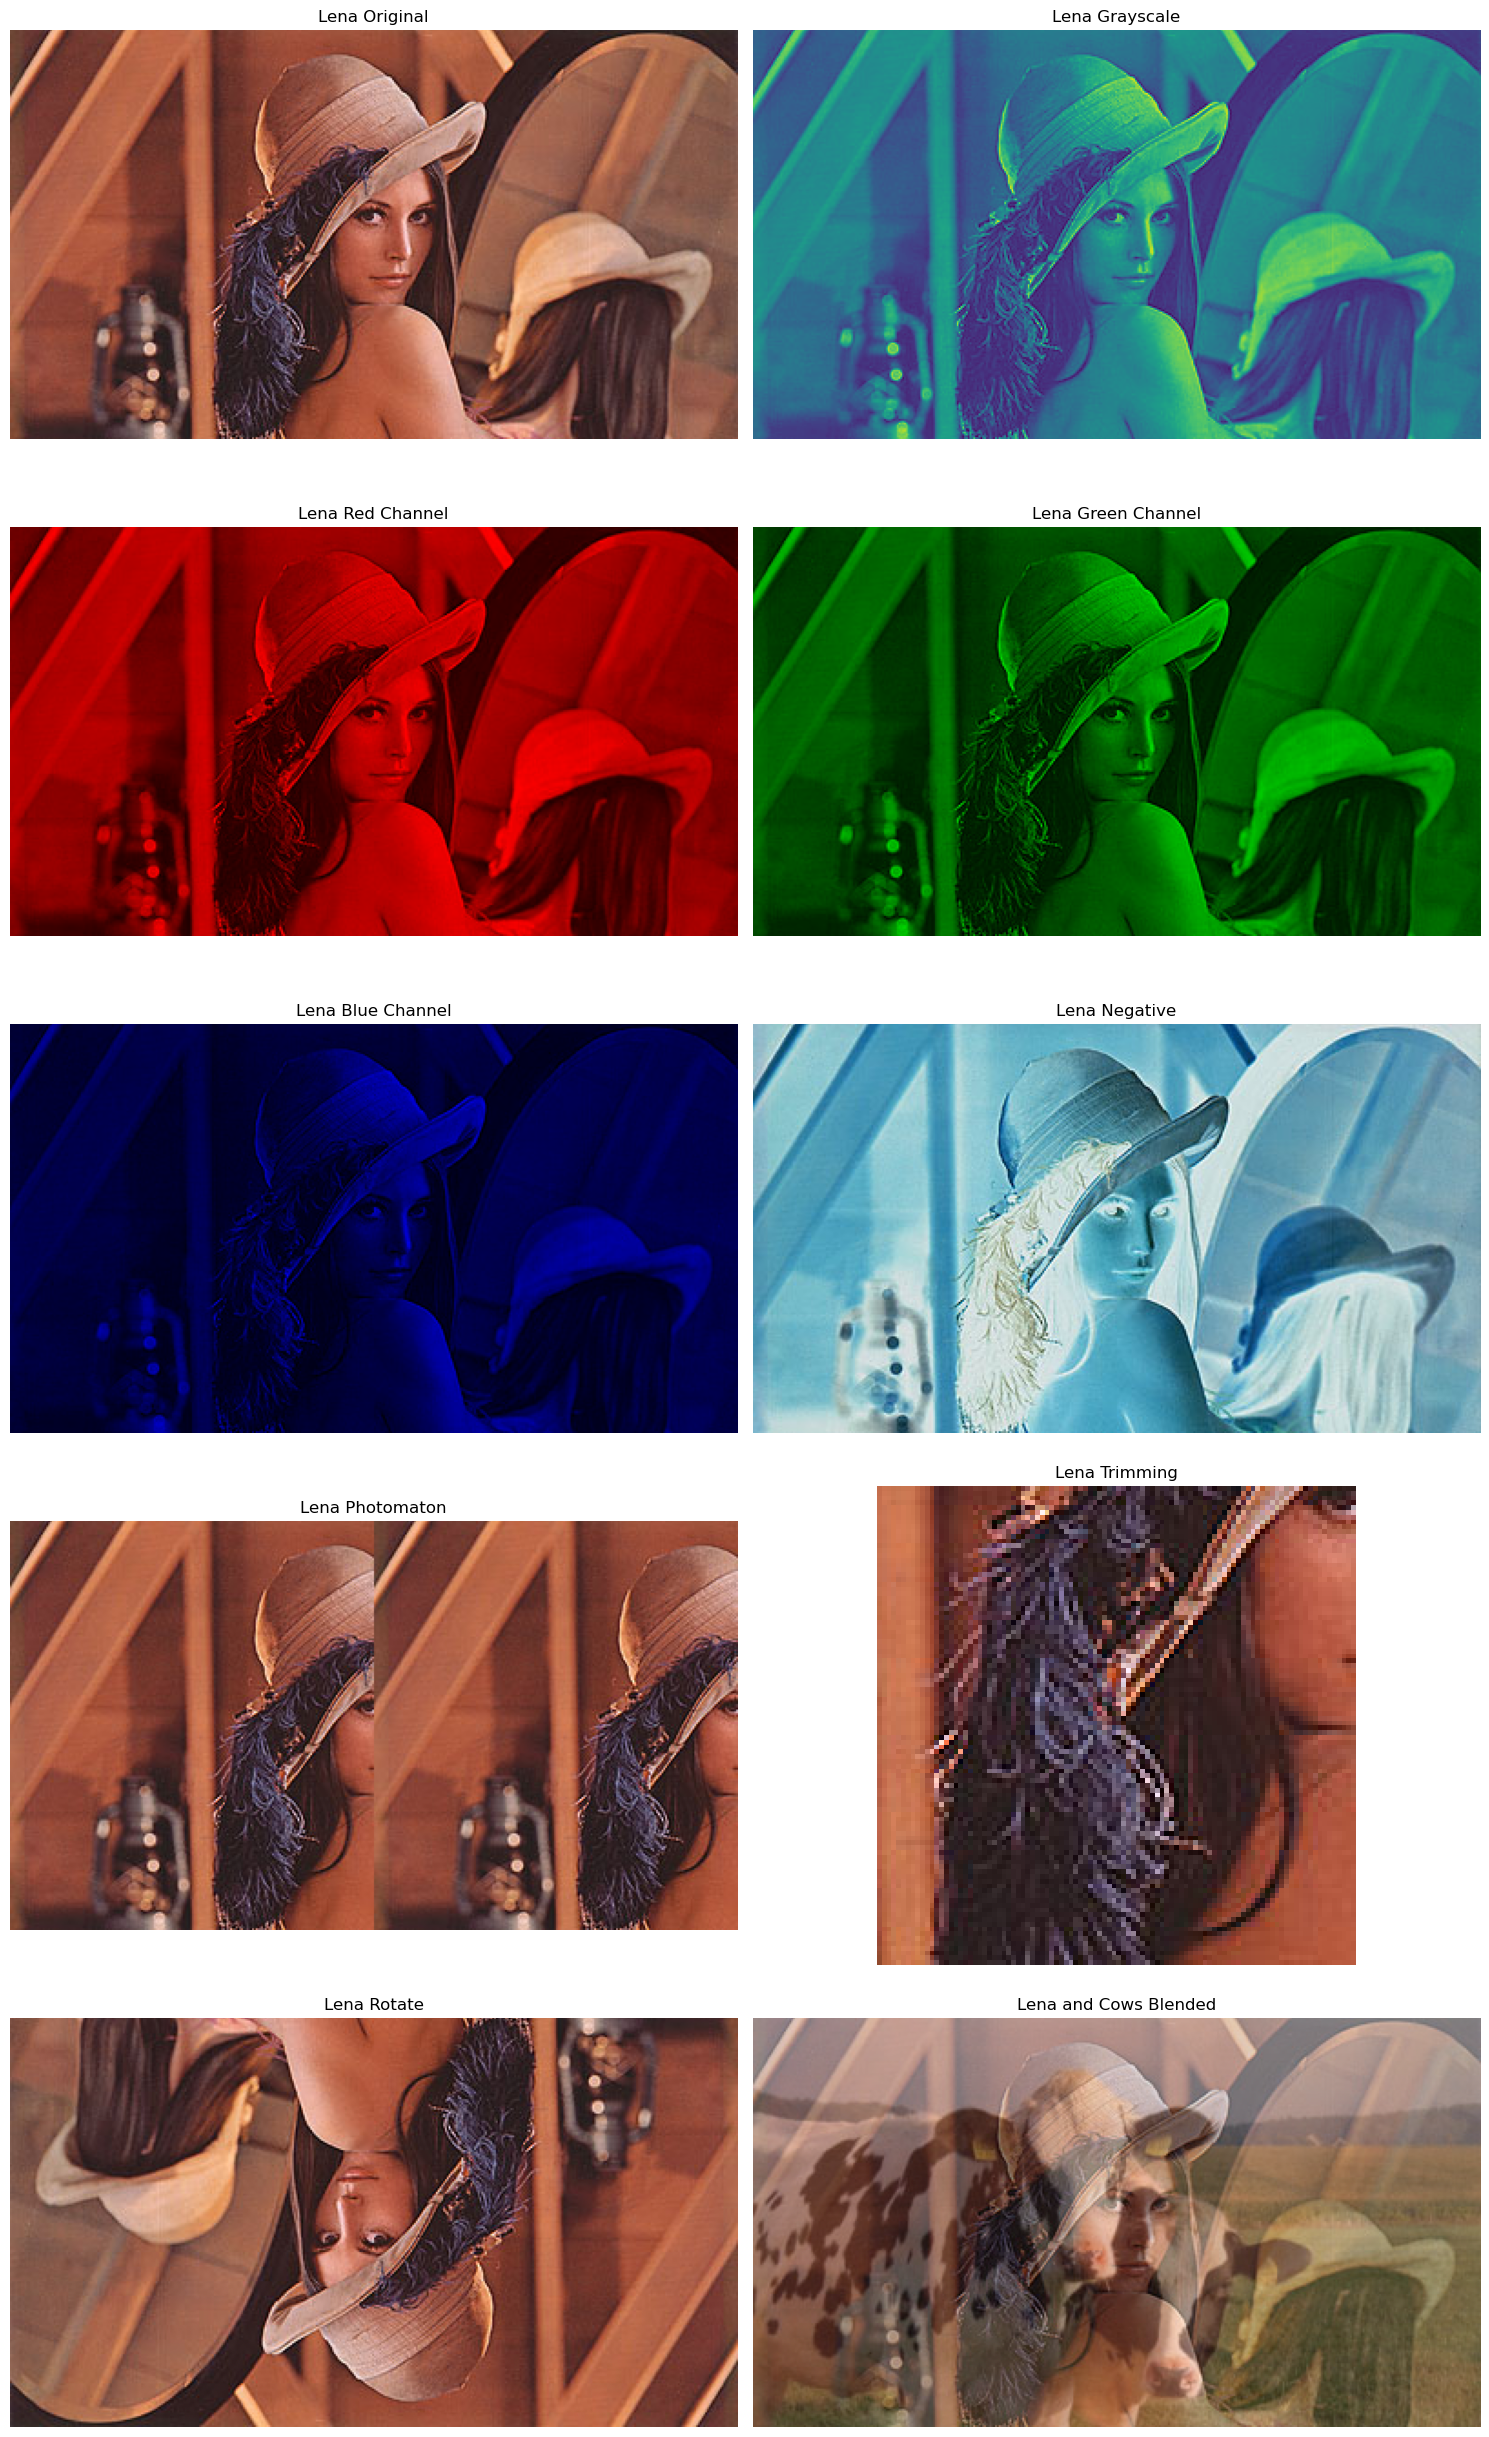

In [194]:
# imgs = [im, lena_grayscale, lred, lgreen, lblue, lena_neg, lena_photomaton, lena_trimmed, lena_rotate, lena_blend]
# titles = ['Lena Original', 'Lena Grayscale', 'Lena Red Channel', 'Lena Green Channel', 'Lena Blue Channel', 'Lena Negative', 'lena photomaton', 'Lena Trimming', 'Lena Rotate', 'Lena and Cows Blended']


# List of images and their corresponding titles
imgs = [im, lena_grayscale, lred, lgreen, lblue, lena_neg, lena_photomaton, lena_trimmed, lena_rotate, lena_blend]
titles = ['Lena Original', 'Lena Grayscale', 'Lena Red Channel', 'Lena Green Channel', 'Lena Blue Channel', 'Lena Negative', 'Lena Photomaton', 'Lena Trimming', 'Lena Rotate', 'Lena and Cows Blended']

# Number of images
num_images = len(imgs)

# Determine the grid size (number of rows and columns)
# For a 2D grid, you might want to use square-ish layouts
n_cols = 2  # Number of columns
n_rows = (num_images + n_cols - 1) // n_cols  # Number of rows, rounded up

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the images and titles
for ax, img, title in zip(axes, imgs, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')  # Hide axis

# Turn off any unused subplots (in case of empty cells)
for ax in axes[len(imgs):]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



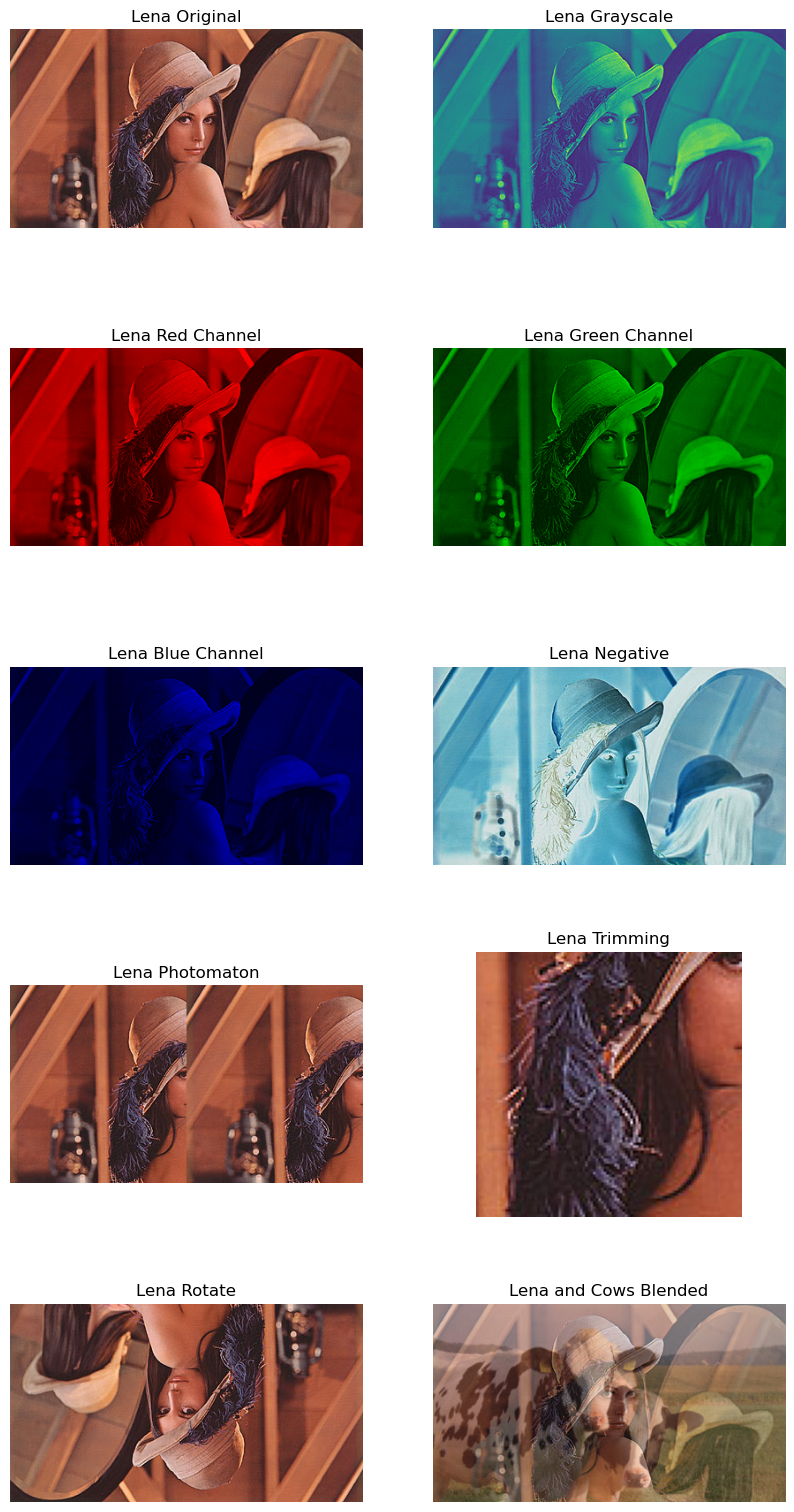

In [192]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_title(titles[i])
    ax.axis('off')

plt.show()

### Display histograms

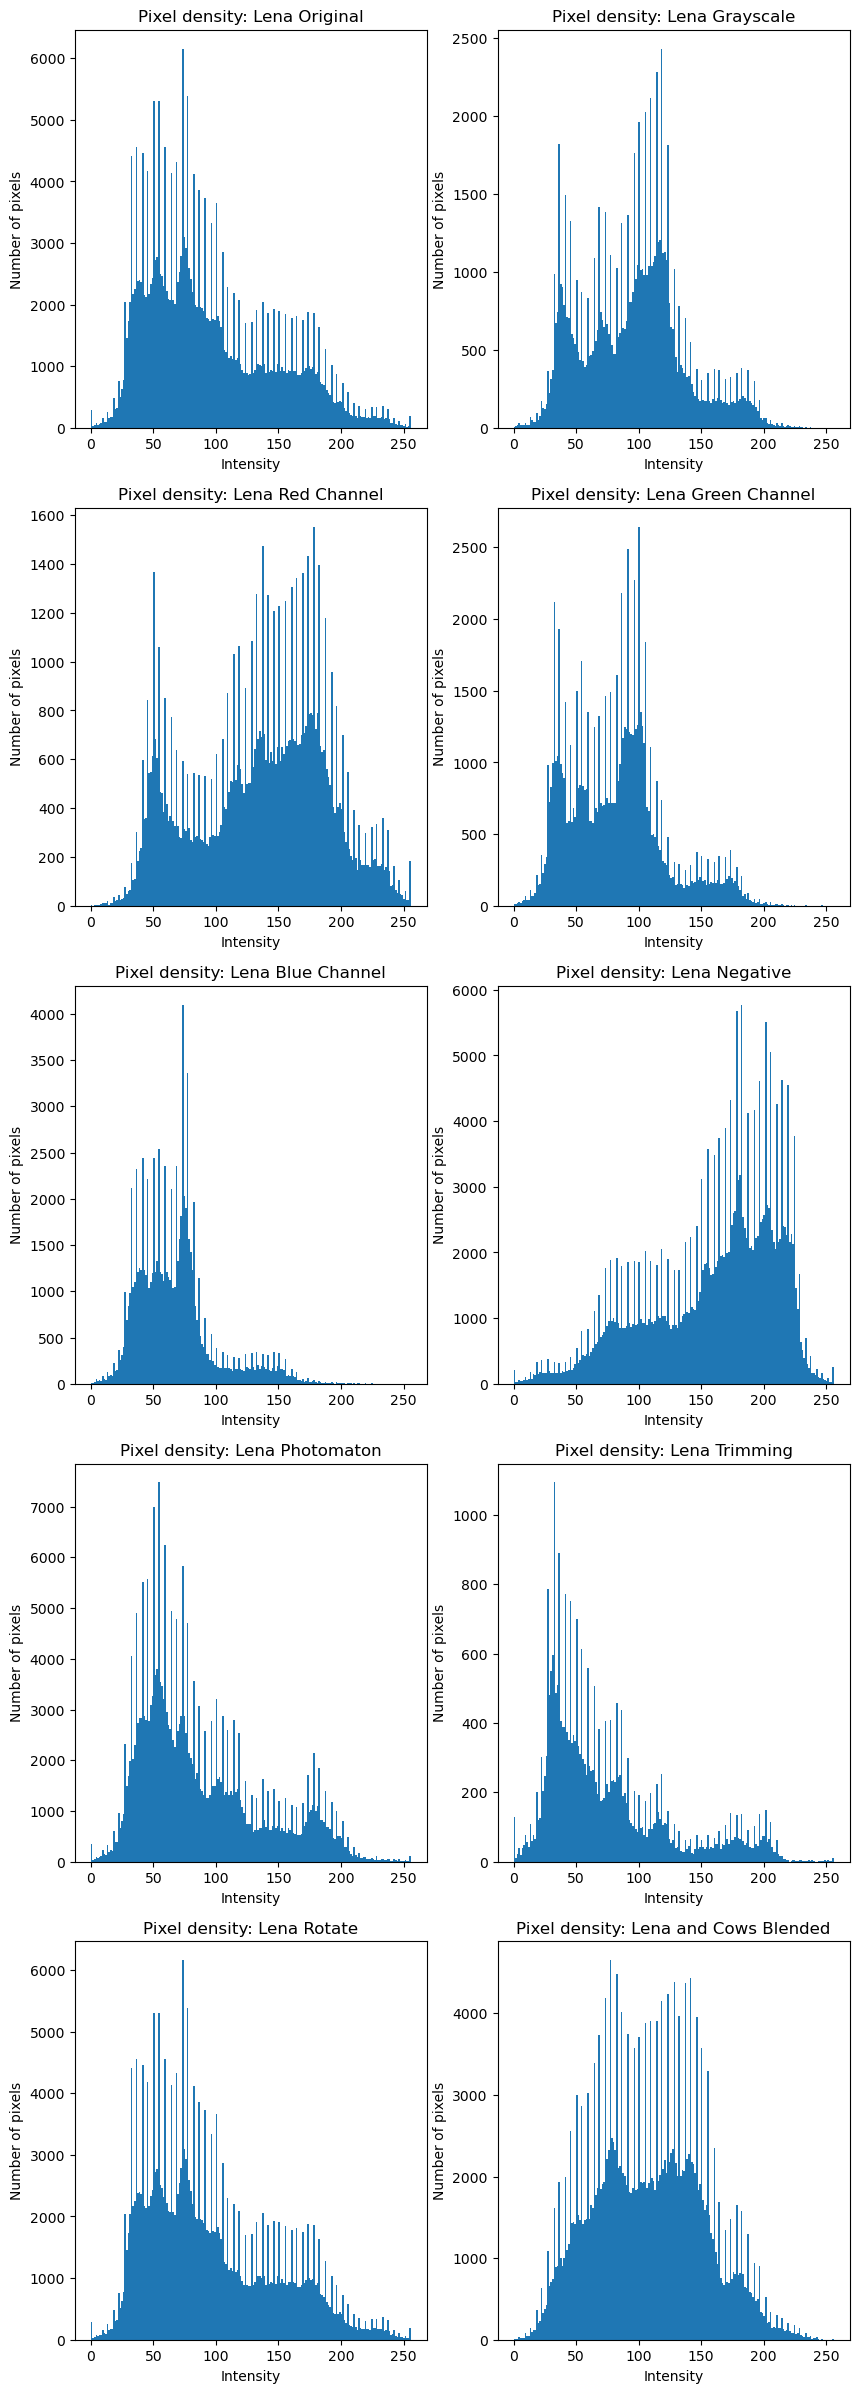

In [190]:
fig, axes = plt.subplots(5, 2, figsize=(10, 30))
for i, ax in enumerate(axes.flat):
  if i in range(2, 5):
    img_flat = imgs[i].flatten()
    img_flat = img_flat[img_flat != 0]
  else:  
    img_flat = imgs[i].flatten()
  ax.hist(img_flat, bins=200, range=[0, 256])
  ax.set_title(f"Pixel density: {titles[i]}")
  ax.set_xlabel("Intensity")
  ax.set_ylabel("Number of pixels")

plt.show()


### Optional [CADEAU]

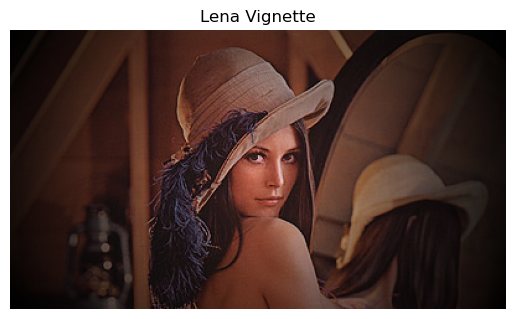

In [189]:
def vignette_effect(image, strength=1.0):
    height, width, _ = image.shape
    cy, cx = height // 2, width // 2

    y, x = np.ogrid[:height, :width]
    y = y - cy
    x = x - cx

    r = np.sqrt(x**2 + y**2)
    r_max = np.sqrt(cy**2 + cx**2)

    vignette = 1 - r / r_max
    vignette = np.clip(vignette, 0, 1)

    # Apply the vignette effect to each channel
    vignette_effect = np.zeros_like(image)
    for i in range(image.shape[2]):
        vignette_effect[:, :, i] = image[:, :, i] * vignette

    return vignette_effect

lena_vignette = vignette_effect(im, 1.5)
display_image(lena_vignette, 'Lena Vignette')

